# Battle of London Borough

#### Finding the Best Place to live for Body Building Enthusiast

## 1. Introduction

### 1.1. Background Story

Mr. Big Guy is a sports enthusiast, especially on Body Bulding. In a week, He is going to move from Paris to London. Because of his passion on body building, he wants to move to a place where there are many options to do body building, i.e. Gym and Fitness Center.

We are going to help Mr. Big Guy to choose the best place for him to live in London.

### 1.2. Ideas

Ideas to solve the problem:

1. Find nearby venues on each borough in London
2. Retrieve all gym venues on London to be analyzed 
3. Cluster gym venues using Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
4. Select the cluster with most number of gym in the cluster
5. If the biggest and most dense cluster is too large (point 4), find the subcluster to obtain the most suitable area which sorrounded by many gym venues

### 1.3. Data

How to obtain data:
1. List of London Borough
Source : from the Wikipedia (London Boroughs, link : https://en.wikipedia.org/wiki/London_boroughs)
2. Coordinate of Borough
Source : longitude and latitiude of each borough can be retrieved with Geopy library
3. Venues
Source : Foursquare API

### 1.4. Methodology

1. Get Table of list of London Borough using beautiful soup from wikipedia page
2. Get the coordinate data (longitude and latitude) from each borough using geopy library
3. From each borough, find the near venue on radius 2km with specific category id of gym / fitness center
4. Clean data and do the preprocessing method
5. CLuster the gym data using DBSCAN
6. Select the cluster with most number of gym in the cluster
7. If the biggest and most dense cluster is too large, find the subcluster to obtain the most suitable area which sorrounded by many gym venues
8. Find the conclusion and summary of the entire process and output

# 

## 2. Preparation

### 2.1 Import required libraries
Especially for downloading and working with table from Wikipedia

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### 2.2 Get the URL and create Beautiful Soup Object

In [2]:
URL = 'https://en.wikipedia.org/wiki/London_boroughs'
page = requests.get(URL)

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

### 2.3 Get the Table from Wikipedia

In [4]:
table = soup.find_all('table')

In [5]:
len(table)

9

In [6]:
table_raw = pd.read_html(str(table[2]), flavor='bs4')[0] #table(2) is the selected table
table_raw.reset_index(drop=True)
table_raw

,London borough,Designation,Former areas,Former areas.1,Former areas.2,Former areas.3,Former areas.4
0,Camden,Inner,Hampstead (11a),St Pancras (11b),Holborn (11c),NaN,NaN
1,Greenwich,Inner,Greenwich (22a),Woolwich (part) (22b),NaN,NaN,NaN
2,Hackney,Inner,Hackney (9a),Shoreditch (9b),Stoke Newington (9c),NaN,NaN
3,Hammersmith[notes 2],Inner,Hammersmith (4a),Fulham (4b),NaN,NaN,NaN
4,Islington,Inner,Islington (10a),Finsbury (10b),NaN,NaN,NaN
5,Kensington and Chelsea,Inner,Kensington (3a),Chelsea (3b),NaN,NaN,NaN
6,Lambeth,Inner,Lambeth (6a),Wandsworth (part) (6b),NaN,NaN,NaN
7,Lewisham,Inner,Lewisham (21a),Deptford (21b),NaN,NaN,NaN
8,Southwark,Inner,Bermondsey (7b),Camberwell (7c),Southwark (7a),NaN,NaN
9,Tower Hamlets,Inner,Bethnal Green (8a),Poplar (8c),Stepney (8b),NaN,NaN


In [7]:
london_bor = pd.DataFrame(table_raw[['London borough','Designation']])
london_bor.rename(columns = {'London borough':'Borough'}, inplace=True)
london_bor

,Borough,Designation
0,Camden,Inner
1,Greenwich,Inner
2,Hackney,Inner
3,Hammersmith[notes 2],Inner
4,Islington,Inner
5,Kensington and Chelsea,Inner
6,Lambeth,Inner
7,Lewisham,Inner
8,Southwark,Inner
9,Tower Hamlets,Inner


In [8]:
# rename the incorrect name of borough
london_bor['Borough'] = london_bor['Borough'].str.replace('[notes 2]', '', regex=False)
london_bor['Borough'] = london_bor['Borough'].str.replace('[notes 3]', '', regex=False)
london_bor

,Borough,Designation
0,Camden,Inner
1,Greenwich,Inner
2,Hackney,Inner
3,Hammersmith,Inner
4,Islington,Inner
5,Kensington and Chelsea,Inner
6,Lambeth,Inner
7,Lewisham,Inner
8,Southwark,Inner
9,Tower Hamlets,Inner


Add city of london Area

In [9]:
london_bor.loc[len(london_bor.index)] = ['City of London', 'Inner'] 

In [10]:
london_bor

,Borough,Designation
0,Camden,Inner
1,Greenwich,Inner
2,Hackney,Inner
3,Hammersmith,Inner
4,Islington,Inner
5,Kensington and Chelsea,Inner
6,Lambeth,Inner
7,Lewisham,Inner
8,Southwark,Inner
9,Tower Hamlets,Inner


### 2.4. Add Geo Data of The Boroughs

In [11]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [12]:
address = ', London'
london_bor['Longitude'] = london_bor['Designation']
london_bor['Latitude'] = london_bor['Designation']


for k in range(len(london_bor)):
    geolocator = Nominatim(user_agent="t_explorer")
    location = geolocator.geocode(str(london_bor['Borough'][k]) + address)
    latitude = location.latitude
    longitude = location.longitude
    london_bor['Latitude'][k] = latitude
    london_bor['Longitude'][k] = longitude

In [13]:
london_bor

,Borough,Designation,Longitude,Latitude
0,Camden,Inner,-0.13956,51.542305
1,Greenwich,Inner,-0.004542,51.482084
2,Hackney,Inner,-0.049362,51.54324
3,Hammersmith,Inner,-0.22364,51.492038
4,Islington,Inner,-0.099905,51.538429
5,Kensington and Chelsea,Inner,-0.199043,51.49848
6,Lambeth,Inner,-0.117287,51.501301
7,Lewisham,Inner,-0.010133,51.462432
8,Southwark,Inner,-0.103458,51.502922
9,Tower Hamlets,Inner,-0.076222,51.50812


### 2.5. Visualize The Boroughs in London

In [14]:
address = 'London'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [15]:
import folium # map rendering library

In [16]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Des, Borough in zip(london_bor['Latitude'], london_bor['Longitude'], london_bor['Designation'], london_bor['Borough']):
    label = '{}, {}'.format(Borough, Des)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

# 

## 3. Get Venues From Foursquare

### 3.1. Define Keys and Function

In [17]:
CLIENT_ID = '1BCHB0C1RPZKMYMFZNFR5M1JQLSGSKPSNOCOLZLDYV0U1PUT' # your Foursquare ID
CLIENT_SECRET = 'RYUK0Q03OPC4WN5OWIP0SDZ2A4K02KDAL3ZTXJHW5Z4KKZDD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1BCHB0C1RPZKMYMFZNFR5M1JQLSGSKPSNOCOLZLDYV0U1PUT
CLIENT_SECRET:RYUK0Q03OPC4WN5OWIP0SDZ2A4K02KDAL3ZTXJHW5Z4KKZDD


In [18]:
category_id = '4bf58dd8d48988d175941735'

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, category_id, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### 3.2. Retrieve Venues in London

In [20]:
london_venues = getNearbyVenues(names=london_bor['Borough'],
                                   latitudes=london_bor['Latitude'],
                                   longitudes=london_bor['Longitude']
                                  )

Camden
Greenwich
Hackney
Hammersmith
Islington
Kensington and Chelsea
Lambeth
Lewisham
Southwark
Tower Hamlets
Wandsworth
Westminster
Barking
Barnet
Bexley
Brent
Bromley
Croydon
Ealing
Enfield
Haringey
Harrow
Havering
Hillingdon
Hounslow
Kingston upon Thames
Merton
Newham
Redbridge
Richmond upon Thames
Sutton
Waltham Forest
City of London


In [21]:
london_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden,51.542305,-0.139560,PureGym,51.539250,-0.143077,Gym / Fitness Center
1,Camden,51.542305,-0.139560,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center
2,Camden,51.542305,-0.139560,FRAME,51.536593,-0.122553,Gym
3,Camden,51.542305,-0.139560,PureGym,51.554052,-0.144984,Gym / Fitness Center
4,Camden,51.542305,-0.139560,Urban Kings,51.531300,-0.121950,Gym / Fitness Center
...,...,...,...,...,...,...,...
1030,City of London,51.515618,-0.091998,Crossfit Aldgate East,51.514626,-0.069102,Gym
1031,City of London,51.515618,-0.091998,Assam Place Gym,51.515643,-0.067872,Gym
1032,City of London,51.515618,-0.091998,Perseverance Works,51.527964,-0.077165,Gym
1033,City of London,51.515618,-0.091998,adidas studio LDN,51.521747,-0.071571,Pilates Studio


In [22]:
london_venues.groupby('Borough').count()


,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking,4,4,4,4,4,4
Barnet,6,6,6,6,6,6
Bexley,2,2,2,2,2,2
Brent,5,5,5,5,5,5
Bromley,11,11,11,11,11,11
Camden,49,49,49,49,49,49
City of London,100,100,100,100,100,100
Croydon,8,8,8,8,8,8
Ealing,12,12,12,12,12,12


### 3.3. Explore the Venue Categories

In [23]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 28 uniques categories.


In [24]:
london_venues['Venue Category'].unique()

array(['Gym / Fitness Center', 'Gym', 'Yoga Studio', 'Gymnastics Gym',
       'Gym Pool', 'School', 'Martial Arts School', 'Pool', 'Track',
       'Pilates Studio', 'Buddhist Temple', 'Climbing Gym',
       'Chiropractor', 'Business Service', "Women's Store", 'Boxing Gym',
       'Dance Studio', 'Community Center', 'Cycle Studio', 'College Gym',
       'Athletics & Sports', 'Temple', 'Office', 'Spa', 'Cricket Ground',
       'Massage Studio', 'Soccer Field', 'Physical Therapist'],
      dtype=object)

### 3.4. Select Gym Venues

In [25]:
gym_categories = ['Gym / Fitness Center', 'Gym']

gym_data_raw = pd.DataFrame()

for cat in gym_categories:
    _select_ven = london_venues[london_venues['Venue Category'] == cat]
    gym_data_raw = gym_data_raw.append(_select_ven)
gym_data_raw = gym_data_raw.reset_index(drop=True)
gym_data_raw

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden,51.542305,-0.139560,PureGym,51.539250,-0.143077,Gym / Fitness Center
1,Camden,51.542305,-0.139560,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center
2,Camden,51.542305,-0.139560,PureGym,51.554052,-0.144984,Gym / Fitness Center
3,Camden,51.542305,-0.139560,Urban Kings,51.531300,-0.121950,Gym / Fitness Center
4,Camden,51.542305,-0.139560,The Armoury Hampstead,51.552551,-0.160132,Gym / Fitness Center
...,...,...,...,...,...,...,...
831,City of London,51.515618,-0.091998,OBSESSIVE GYM DISORDER,51.527809,-0.086541,Gym
832,City of London,51.515618,-0.091998,Crossfit Aldgate East,51.514626,-0.069102,Gym
833,City of London,51.515618,-0.091998,Assam Place Gym,51.515643,-0.067872,Gym
834,City of London,51.515618,-0.091998,Perseverance Works,51.527964,-0.077165,Gym


In [26]:
gym_data_raw.shape

(836, 7)

In [27]:
gym_data = gym_data_raw.drop_duplicates(subset=["Venue", "Venue Latitude"]).reset_index(drop=True)

In [28]:
gym_data.shape

(534, 7)

In [29]:
nearest_borough = []

In [30]:
for venue in range(len(gym_data.index)):
    jarak = list((gym_data['Venue Latitude'][venue] - london_bor['Latitude'])**2 + (gym_data['Venue Longitude'][venue] - london_bor['Longitude'])**2)
    nearest_borough.append(jarak.index(min(jarak)))

In [31]:
gym_data['Nearest Borough'] = list(london_bor['Borough'][nearest_borough])

In [32]:
gym_data

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Nearest Borough
0,Camden,51.542305,-0.139560,PureGym,51.539250,-0.143077,Gym / Fitness Center,Camden
1,Camden,51.542305,-0.139560,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center,Camden
2,Camden,51.542305,-0.139560,PureGym,51.554052,-0.144984,Gym / Fitness Center,Havering
3,Camden,51.542305,-0.139560,Urban Kings,51.531300,-0.121950,Gym / Fitness Center,Camden
4,Camden,51.542305,-0.139560,The Armoury Hampstead,51.552551,-0.160132,Gym / Fitness Center,Havering
...,...,...,...,...,...,...,...,...
529,Newham,51.530000,0.029318,Atherton Leisure Centre,51.544646,0.015263,Gym,Newham
530,Newham,51.530000,0.029318,East River Spa,51.516235,0.010779,Gym,Newham
531,Richmond upon Thames,51.440553,-0.307639,Blitz CrossFit,51.448928,-0.332068,Gym,Richmond upon Thames
532,Sutton,51.357464,-0.173627,Go-Gym,51.360355,-0.195039,Gym,Sutton


In [33]:
gym_data = gym_data.drop(columns=['Borough','Borough Latitude', 'Borough Longitude'])

In [34]:
gym_data = gym_data.rename(columns={'Nearest Borough':'Borough'})

In [35]:
gym_data

,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,PureGym,51.539250,-0.143077,Gym / Fitness Center,Camden
1,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center,Camden
2,PureGym,51.554052,-0.144984,Gym / Fitness Center,Havering
3,Urban Kings,51.531300,-0.121950,Gym / Fitness Center,Camden
4,The Armoury Hampstead,51.552551,-0.160132,Gym / Fitness Center,Havering
...,...,...,...,...,...
529,Atherton Leisure Centre,51.544646,0.015263,Gym,Newham
530,East River Spa,51.516235,0.010779,Gym,Newham
531,Blitz CrossFit,51.448928,-0.332068,Gym,Richmond upon Thames
532,Go-Gym,51.360355,-0.195039,Gym,Sutton


### 3.5. Visualize Gym Venues

In [36]:
address = 'London'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [37]:
# create map of London using latitude and longitude values
map_london_selected = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Ven, Ven_cat, Borough in zip(gym_data['Venue Latitude'], 
                                           gym_data['Venue Longitude'], 
                                           gym_data['Venue'], 
                                           gym_data['Venue Category'], 
                                           gym_data['Borough']
                                          ):
    label = 'Venue: {}, Category: {}, Borough: {}'.format(Ven, Ven_cat, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_selected)  
    
map_london_selected

# 

## 4. Clustering Gym Venues

### 4.1. Select Clustering Dataset

In [38]:
gym_clustering = gym_data[['Venue Latitude', 'Venue Longitude']]
gym_clustering

,Venue Latitude,Venue Longitude
0,51.539250,-0.143077
1,51.527075,-0.131056
2,51.554052,-0.144984
3,51.531300,-0.121950
4,51.552551,-0.160132
...,...,...
529,51.544646,0.015263
530,51.516235,0.010779
531,51.448928,-0.332068
532,51.360355,-0.195039


### 4.2. Data Normalization

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
gym_clustering = StandardScaler().fit_transform(gym_clustering)
gym_clustering

array([[ 0.69206011, -0.12992413],
       [ 0.43324674,  0.01367804],
       [ 1.00671281, -0.15270517],
       ...,
       [-1.22798529, -2.38759758],
       [-3.11084416, -0.75065462],
       [ 1.43023626,  1.45617405]])

### 4.3. Clustering using DBSCAN

#### 4.3.1. Find the optimum Epsilon

In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(gym_clustering)
distances, indices = nbrs.kneighbors(gym_clustering)

In [43]:
from matplotlib import pyplot as plt

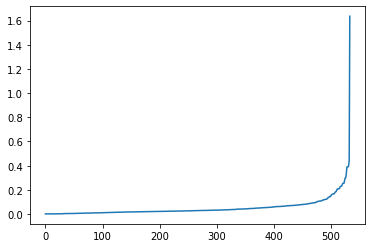

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The Optimum Epsilon is around 0.15

#### 4.3.2. Clustering with DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
epsilon = 0.2
minimumSamples = 20

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(gym_clustering)
labels = db.labels_
labels

array([ 0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
       -1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  3,  3,  4,  2,  3,
        3,  3,  3, -1, -1, -1,  4,  3,  3,  4,  3,  3,  4,  3,  4,  2, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  2,  2,  2,  2,  2, -1, -1, -1,  2,  2, -1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1

In [47]:
# Number of clusters in labels, including noise if present.
DBSCANclusters = len(set(labels))
DBSCANclusters

6

In [48]:
# add clustering labels
gym_data_clustered = gym_data.copy()
gym_data_clustered.insert(0, 'Cluster', labels)
gym_data_clustered.head(3)

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,0,PureGym,51.539250,-0.143077,Gym / Fitness Center,Camden
1,0,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center,Camden
2,-1,PureGym,51.554052,-0.144984,Gym / Fitness Center,Havering


### 4.4. Visualize Clustering Output

In [49]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, cluster in zip(gym_data_clustered['Venue Latitude'], 
                                                    gym_data_clustered['Venue Longitude'], 
                                                    gym_data_clustered['Venue'], 
                                                    gym_data_clustered['Venue Category'],
                                                    gym_data_clustered['Borough'],
                                                    gym_data_clustered['Cluster']
                                                   ):
    label = 'Venue: {}, Category: {}, Borough: {}, Cluster: {}'.format(Ven, Ven_cat, Borough, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 

## 5. Analyze each Cluster

### 5.1. Cluster 1

In [52]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 0]

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,0,PureGym,51.539250,-0.143077,Gym / Fitness Center,Camden
1,0,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center,Camden
3,0,Urban Kings,51.531300,-0.121950,Gym / Fitness Center,Camden
6,0,Pancras Square Leisure Centre,51.533709,-0.126546,Gym / Fitness Center,Camden
7,0,Somers Town Community Sports Centre,51.532768,-0.133157,Gym / Fitness Center,Camden
8,0,DW Fitness First,51.537638,-0.144675,Gym / Fitness Center,Havering
9,0,Swoove With Stefan,51.537153,-0.140676,Gym / Fitness Center,Camden
10,0,Virgin Active,51.525623,-0.141191,Gym / Fitness Center,Camden
11,0,The Regent's Place Health Club,51.525449,-0.141039,Gym / Fitness Center,Camden
13,0,Timitraining,51.527783,-0.136921,Gym / Fitness Center,Camden


### 5.2. Cluster 2

In [53]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 1]

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
18,1,FLYKICK,51.524560,-0.141860,Gym / Fitness Center,Camden
44,1,Gym,51.528623,-0.061491,Gym / Fitness Center,Hackney
69,1,Virgin Active,51.531343,-0.105135,Gym / Fitness Center,Islington
70,1,Nuffield Health Fitness & Wellbeing Gym,51.537219,-0.101654,Gym / Fitness Center,Islington
71,1,The Gym,51.530020,-0.103147,Gym / Fitness Center,Islington
...,...,...,...,...,...,...
489,1,The May Fair Gym,51.508483,-0.144305,Gym,Westminster
490,1,Gym at Four Seasons Hotel,51.504278,-0.150245,Gym,Westminster
491,1,Hiton Fitness By Precor,51.505676,-0.150208,Gym,Westminster
492,1,Cityboxer,51.503620,-0.100891,Gym,Southwark


### 5.3. Cluster 3

In [54]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 2]

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
49,2,Core Collective,51.499589,-0.198630,Gym / Fitness Center,Kensington and Chelsea
66,2,Fit Rooms,51.484360,-0.201729,Gym / Fitness Center,Kensington and Chelsea
105,2,Virgin Active,51.502666,-0.189742,Gym / Fitness Center,Kensington and Chelsea
106,2,Equinox Kensington,51.501369,-0.191634,Gym / Fitness Center,Kensington and Chelsea
107,2,Harbour Club Kensington,51.495131,-0.187962,Gym / Fitness Center,Kensington and Chelsea
108,2,Barry's Bootcamp,51.510740,-0.187346,Gym / Fitness Center,Kensington and Chelsea
109,2,The Chelsea Health Club & Spa,51.482587,-0.190954,Gym / Fitness Center,Kensington and Chelsea
113,2,Ethos Gym,51.499947,-0.173461,Gym / Fitness Center,Kensington and Chelsea
114,2,Lomax,51.487285,-0.178811,Gym / Fitness Center,Kensington and Chelsea
116,2,Gym at Millennium Gloucester,51.493519,-0.183564,Gym / Fitness Center,Kensington and Chelsea


### 5.4. Cluster 4

In [55]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 3]

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
46,3,Crossfit Hammersmith,51.493968,-0.230378,Gym / Fitness Center,Hammersmith
47,3,PureGym,51.494197,-0.224909,Gym / Fitness Center,Hammersmith
50,3,DW Fitness First,51.494833,-0.226332,Gym / Fitness Center,Hammersmith
51,3,Gymbox,51.506655,-0.220276,Gym / Fitness Center,Hammersmith
52,3,Virgin Active,51.492974,-0.220030,Gym / Fitness Center,Hammersmith
53,3,DW Fitness First,51.504286,-0.219033,Gym / Fitness Center,Hammersmith
58,3,Gym London,51.492018,-0.220952,Gym / Fitness Center,Hammersmith
59,3,Surge,51.494342,-0.224082,Gym / Fitness Center,Hammersmith
61,3,FRAME,51.492997,-0.227286,Gym / Fitness Center,Hammersmith
62,3,Boomcycle,51.493767,-0.225975,Gym / Fitness Center,Hammersmith


### 5.5. Cluster 5

In [56]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 4]

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
48,4,Charing Cross Sports Club,51.485631,-0.219649,Gym / Fitness Center,Hammersmith
57,4,Virgin Active,51.484116,-0.208667,Gym / Fitness Center,Hammersmith
60,4,Better Lillie Road Fitness Centre,51.483274,-0.216686,Gym / Fitness Center,Hammersmith
63,4,Fulham Reach Gym & Spa,51.487649,-0.225533,Gym / Fitness Center,Hammersmith
65,4,Fulham Pools,51.484142,-0.207793,Gym / Fitness Center,Kensington and Chelsea
399,4,Energize Gym,51.490875,-0.215273,Gym,Hammersmith


### 5.6. Cluster 6

In [57]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 5]

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough


### 5.7. Cluster -1 (Outlier)

Outlier Data didn't assigned on any cluster, because they are too far away from other gym / fitness center to be assigned on any cluster

In [58]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == -1]

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
2,-1,PureGym,51.554052,-0.144984,Gym / Fitness Center,Havering
4,-1,The Armoury Hampstead,51.552551,-0.160132,Gym / Fitness Center,Havering
5,-1,énergie Fitness,51.553423,-0.143353,Gym / Fitness Center,Havering
12,-1,Basement Dance Studio,51.548611,-0.128485,Gym / Fitness Center,Camden
14,-1,Be Military Fit,51.555573,-0.150320,Gym / Fitness Center,Havering
...,...,...,...,...,...,...
529,-1,Atherton Leisure Centre,51.544646,0.015263,Gym,Newham
530,-1,East River Spa,51.516235,0.010779,Gym,Newham
531,-1,Blitz CrossFit,51.448928,-0.332068,Gym,Richmond upon Thames
532,-1,Go-Gym,51.360355,-0.195039,Gym,Sutton


In [59]:
gym_data_clustered_no_outlier = gym_data_clustered.drop(gym_data_clustered[gym_data_clustered['Cluster']== -1].index)

In [60]:
gym_data_clustered_no_outlier

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,0,PureGym,51.539250,-0.143077,Gym / Fitness Center,Camden
1,0,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center,Camden
3,0,Urban Kings,51.531300,-0.121950,Gym / Fitness Center,Camden
6,0,Pancras Square Leisure Centre,51.533709,-0.126546,Gym / Fitness Center,Camden
7,0,Somers Town Community Sports Centre,51.532768,-0.133157,Gym / Fitness Center,Camden
...,...,...,...,...,...,...
489,1,The May Fair Gym,51.508483,-0.144305,Gym,Westminster
490,1,Gym at Four Seasons Hotel,51.504278,-0.150245,Gym,Westminster
491,1,Hiton Fitness By Precor,51.505676,-0.150208,Gym,Westminster
492,1,Cityboxer,51.503620,-0.100891,Gym,Southwark


In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, cluster in zip(gym_data_clustered_no_outlier['Venue Latitude'], 
                                                    gym_data_clustered_no_outlier['Venue Longitude'], 
                                                    gym_data_clustered_no_outlier['Venue'], 
                                                    gym_data_clustered_no_outlier['Venue Category'],
                                                    gym_data_clustered_no_outlier['Borough'],
                                                    gym_data_clustered_no_outlier['Cluster']
                                                   ):
    label = 'Venue: {}, Category: {}, Borough: {}, Cluster: {}'.format(Ven, Ven_cat, Borough, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Clustering Gym Venues

In [62]:
london_gym = gym_data_clustered[gym_data_clustered['Cluster']==1]
london_gym

,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
18,1,FLYKICK,51.524560,-0.141860,Gym / Fitness Center,Camden
44,1,Gym,51.528623,-0.061491,Gym / Fitness Center,Hackney
69,1,Virgin Active,51.531343,-0.105135,Gym / Fitness Center,Islington
70,1,Nuffield Health Fitness & Wellbeing Gym,51.537219,-0.101654,Gym / Fitness Center,Islington
71,1,The Gym,51.530020,-0.103147,Gym / Fitness Center,Islington
...,...,...,...,...,...,...
489,1,The May Fair Gym,51.508483,-0.144305,Gym,Westminster
490,1,Gym at Four Seasons Hotel,51.504278,-0.150245,Gym,Westminster
491,1,Hiton Fitness By Precor,51.505676,-0.150208,Gym,Westminster
492,1,Cityboxer,51.503620,-0.100891,Gym,Southwark


In [63]:
london_gym['Borough'].unique()

array(['Camden', 'Hackney', 'Islington', 'City of London', 'Lambeth',
       'Southwark', 'Westminster', 'Tower Hamlets'], dtype=object)

### 4.1. Select Clustering Dataset

In [64]:
london_gym_clustering = london_gym[['Venue Latitude', 'Venue Longitude']]
london_gym_clustering

,Venue Latitude,Venue Longitude
18,51.524560,-0.141860
44,51.528623,-0.061491
69,51.531343,-0.105135
70,51.537219,-0.101654
71,51.530020,-0.103147
...,...,...
489,51.508483,-0.144305
490,51.504278,-0.150245
491,51.505676,-0.150208
492,51.503620,-0.100891


### 4.2. Data Normalization

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
london_gym_clustering = StandardScaler().fit_transform(london_gym_clustering)

## Clustering

#### 4.3.1. Find the optimum Epsilon

In [67]:
# from sklearn.neighbors import NearestNeighbors

In [68]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(london_gym_clustering)
distances, indices = nbrs.kneighbors(london_gym_clustering)

In [69]:
# from matplotlib import pyplot as plt

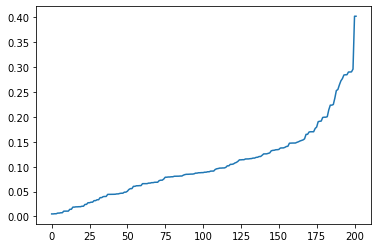

In [70]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The Optimum Epsilon is around 0.2

#### 4.3.2. Clustering with DBSCAN

In [71]:
# from sklearn.cluster import DBSCAN

In [72]:
epsilon = 0.2
minimumSamples = 10

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(london_gym_clustering)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,
        1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [73]:
# Number of clusters in labels, ignoring noise if present.
DBSCANclusters = len(set(labels))
DBSCANclusters

3

In [74]:
# add clustering labels
london_gym_clustered = london_gym.copy()
london_gym_clustered.insert(0, 'Sub Cluster', labels)
london_gym_clustered.head(3)

,Sub Cluster,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
18,-1,1,FLYKICK,51.524560,-0.141860,Gym / Fitness Center,Camden
44,-1,1,Gym,51.528623,-0.061491,Gym / Fitness Center,Hackney
69,-1,1,Virgin Active,51.531343,-0.105135,Gym / Fitness Center,Islington


In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, Subcluster in zip(london_gym_clustered['Venue Latitude'], 
                                                       london_gym_clustered['Venue Longitude'],
                                                       london_gym_clustered['Venue'], 
                                                       london_gym_clustered['Venue Category'],
                                                       london_gym_clustered['Borough'],
                                                       london_gym_clustered['Sub Cluster']
                                                      ):
    label = 'Venue: {}, Category: {}, Borough: {}, Sub Cluster: {}'.format(Ven, Ven_cat, Borough, Subcluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[Subcluster],
        fill=True,
        fill_color=rainbow[Subcluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5.1. Cluster 1

In [77]:
london_gym_clustered.loc[london_gym_clustered['Sub Cluster'] == 0]

,Sub Cluster,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
74,0,1,Gymbox,51.525592,-0.089320,Gym / Fitness Center,City of London
94,0,1,iQ Shoreditch Gym,51.527797,-0.087624,Gym / Fitness Center,City of London
95,0,1,Ravercise Ltd,51.527277,-0.088667,Gym / Fitness Center,City of London
96,0,1,Outrivals,51.527736,-0.086560,Gym / Fitness Center,City of London
97,0,1,Beth Lavis Fitness,51.525530,-0.088180,Gym / Fitness Center,City of London
413,0,1,London Fight Factory,51.528507,-0.089985,Gym,City of London
417,0,1,Britannia Building Gym,51.528238,-0.089165,Gym,City of London
418,0,1,M by Montcalm Fitness,51.527703,-0.089121,Gym,City of London
419,0,1,OBSESSIVE GYM DISORDER,51.527809,-0.086541,Gym,City of London
421,0,1,Crossfit City Road,51.525554,-0.089410,Gym,City of London


### 5.1. Cluster 1

In [78]:
london_gym_clustered.loc[london_gym_clustered['Sub Cluster'] == 1]

,Sub Cluster,Cluster,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
216,1,1,1Rebel,51.515569,-0.080040,Gym / Fitness Center,Tower Hamlets
226,1,1,DW Fitness First,51.517134,-0.079147,Gym / Fitness Center,Tower Hamlets
230,1,1,Crossfit Aldgate,51.515630,-0.078790,Gym / Fitness Center,Tower Hamlets
231,1,1,DW Fitness First,51.517685,-0.080989,Gym / Fitness Center,Tower Hamlets
235,1,1,DW Fitness First,51.517709,-0.077321,Gym / Fitness Center,Tower Hamlets
463,1,1,No1 Studio Training,51.515372,-0.080063,Gym,Tower Hamlets
465,1,1,Equinox Bishopsgate,51.515655,-0.081053,Gym,Tower Hamlets
467,1,1,IgnitePT,51.517270,-0.076664,Gym,Tower Hamlets
468,1,1,Andaz Health Club,51.517024,-0.081103,Gym,Tower Hamlets
469,1,1,Sky Gym - Nido Spitalfields,51.517668,-0.076767,Gym,Tower Hamlets
